# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Decision trees are built by repeatedly splitting the data based on the feature that best separates the target variable. At each step, the tree chooses the split that makes the resulting groups as pure as possible. This process continues down each branch until the data is either perfectly split or certain stopping rules are met. The final tree is basically a flowchart of decisions that leads to a prediction.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships really well because they split data based on conditions, not equations. They can easily capture weird patterns and interactions. Linear models, on the other hand, assume a straight-line relationship, so they miss the mark unless you manually tweak things.

3. Why is the Gini a good loss function for categorical target variables?

The Gini index is a solid loss function for categorical targets because it helps the tree figure out how "pure" each group is. A Gini of 0 means all the data points are from the same category (perfect split), while higher values mean the categories are mixed. Since trees are all about splitting the data into clean, distinct groups, Gini helps them choose the splits that make those groups as different as possible.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because they just keep splitting the data until everything is super clean, which ends up making them memorize the training data. To avoid this, you can set limits, like stopping the tree from growing too deep, making sure each split has enough data points, or cutting off branches that aren’t doing much. That way, the tree doesn’t get too obsessed with the little details and can actually generalize better to new stuff.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False. Trees don’t just work well with lots of categorical variables; they’re actually pretty solid with both categorical and numerical features. They handle categorical data easily by splitting on distinct values, but they also deal with continuous variables by creating splits based on numbers. So, trees are pretty versatile and can handle a mix of both types of features, not just categorical ones.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most versions of classification/regression trees don’t allow more than two branches after a split because it keeps things simple and easy to interpret. A binary split craetes a clean decision path, making the tree easier to understand and manage. If you had more than two branches, the tree would get a lot more complex, harder to visualize, and might ber harder to train without overfitting. Plus, binary splits often work just fine in practice and help the model stay efficient.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

To check if a decision tree is overfitting or underfitting, just look at a few things. If the tree is super deep, it’s probably overfitting, and if it’s too shallow, it might be underfitting. Compare how it does on the training vs. test data: if it nails the training set but fails the test set, it's overfitting. If it does poorly on both, it’s underfitting. Big, complex trees overfit, while simple ones can underfit. For regression trees, if the residuals are all over the place or huge, it’s overfitting, but if they’re small and random, the fit is probably good.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [175]:
import pandas as pd

df=pd.read_csv('Data/Breast Cancer METABRIC.csv')
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} variables.')
df.head(3)
df['Overall Survival Status'].unique()

This dataset has 2509 observations and 34 variables.


array(['Living', 'Deceased', nan], dtype=object)

In [177]:
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df = df.dropna()

# one-hot encode
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

# feature matrix 
X = pd.concat([df[numeric_vars].reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

X.head(3)

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma
0,10.0,0.0,43.19,1.0,False,True,False,False,False
1,40.0,8.0,76.97,2.0,True,False,False,False,True
2,31.0,0.0,78.77,4.0,False,True,False,False,False


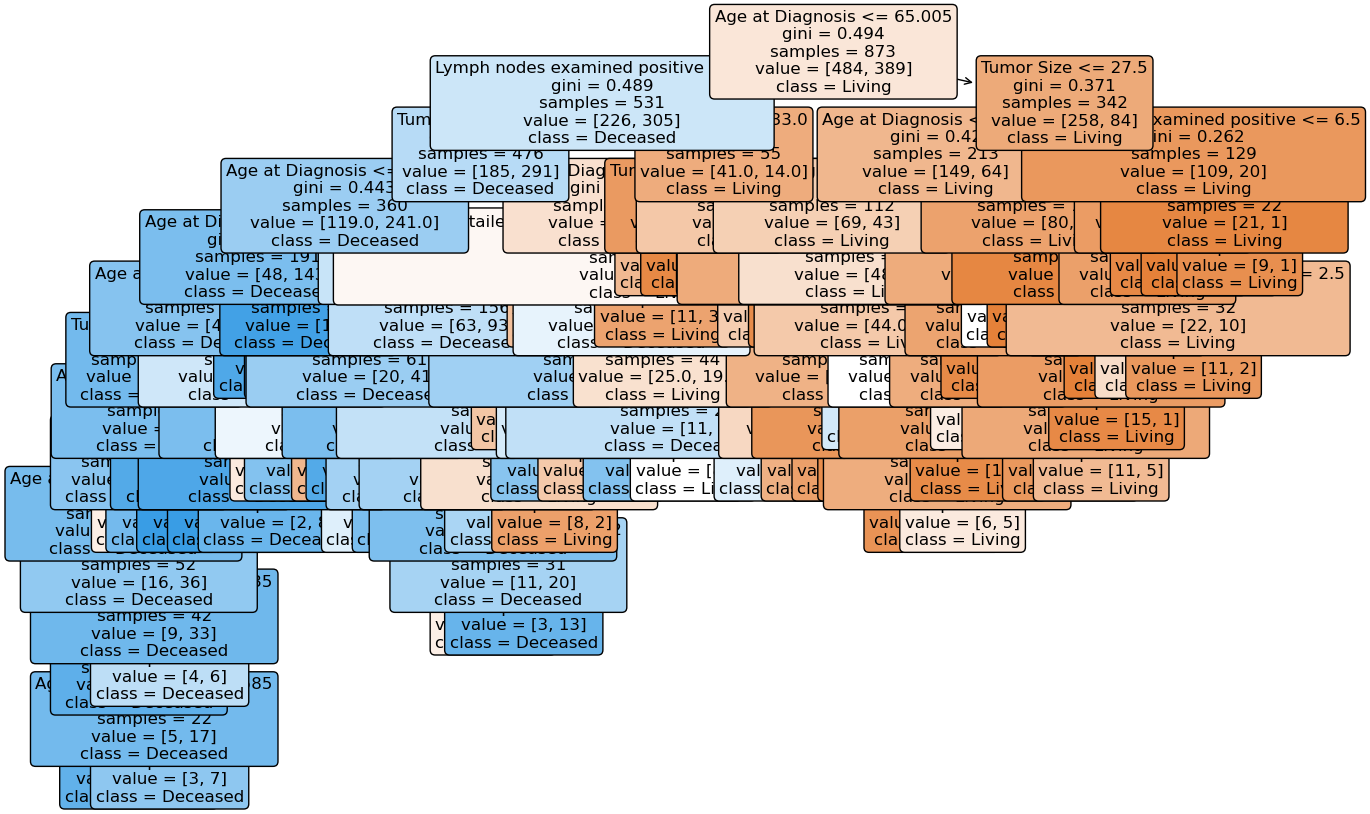

Accuracy: 0.6347


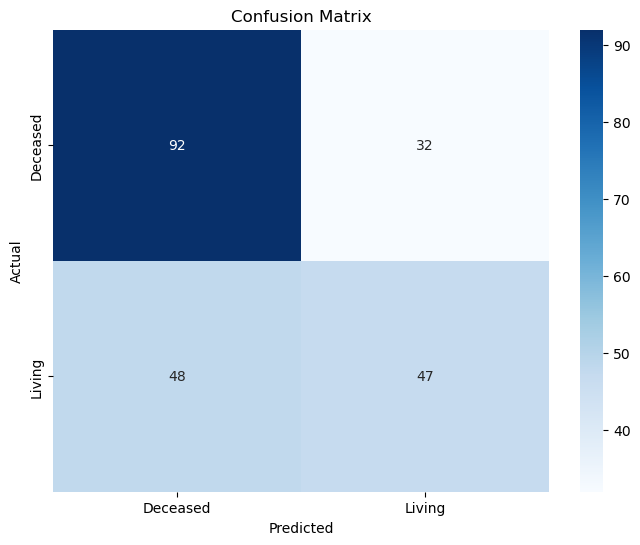

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# drop nan
df = df.dropna(subset=['Overall Survival Status'])

# target variable
y = df['Overall Survival Status']

# split dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# minimum samples per leaf = 10
model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# train model
model.fit(X_train, y_train)

# plot dendrogram
plt.figure(figsize=(15, 10))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in y.unique()], 
          rounded=True, 
          fontsize=12)
plt.show()

# predictions
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [180]:
# extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# sensitivity (TP)
sensitivity = TP / (TP + FN)
print(f"True Positive Rate (Sensitivity): {sensitivity:.4f}")

# specificity (TN)
specificity = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {specificity:.4f}")

# compare
if sensitivity > specificity:
    print("The model performs better with respect to Sensitivity (True Positive Rate).")
elif specificity > sensitivity:
    print("The model performs better with respect to Specificity (True Negative Rate).")
else:
    print("The model performs equally well with respect to both Sensitivity and Specificity.")

True Positive Rate (Sensitivity): 0.4947
True Negative Rate (Specificity): 0.7419
The model performs better with respect to Specificity (True Negative Rate).


Optimal min_samples_leaf: 52
R² score: 0.1501


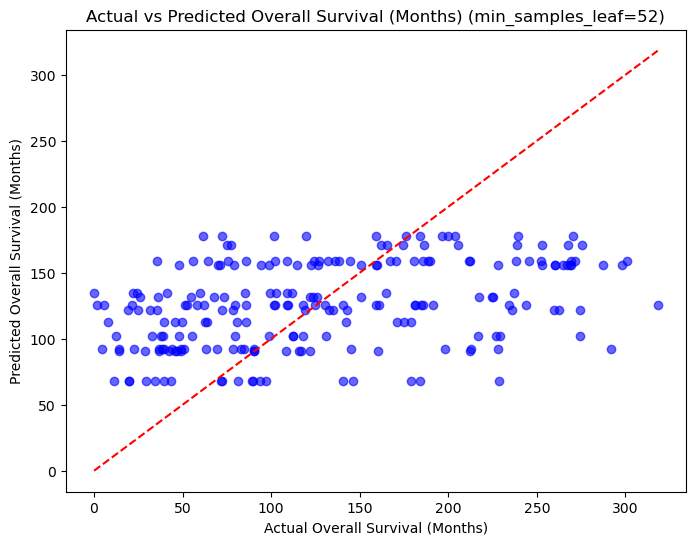

In [185]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# target variable Overall Survival (Months)
y = df['Overall Survival (Months)']

# split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# range for min_samples_leaf with target of 110
min_samples_leaf_values = range(1, 300) 
r2_scores = []

# iterate over values of min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# find optimal min_samples_leaf w highest R² score
optimal_min_samples_leaf = min_samples_leaf_values[np.argmax(r2_scores)]
print(f"Optimal min_samples_leaf: {optimal_min_samples_leaf}")

# train w optimal min_samples_leaf
model = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=42)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

# plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Overall Survival (Months)')
plt.ylabel('Predicted Overall Survival (Months)')
plt.title(f'Actual vs Predicted Overall Survival (Months) (min_samples_leaf={optimal_min_samples_leaf})')
plt.show()

# This model did not perform very well at all. It did not select the optimal samples per leaf and the predicted v actual
# survival is not linear or close to 1 to 1, meaning it is not very accurate

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

In [188]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=100)

# 2. Fit a decision tree regressor
tree = DecisionTreeRegressor(max_leaf_nodes=5)
tree.fit(X, y)

# 3. Get the leaf node each sample ends up in
leaf_nodes = tree.apply(X)  # array of leaf IDs

# 4. Create dummy variables for the leaf nodes
df_leaf = pd.get_dummies(leaf_nodes, prefix='leaf')

# 5. Fit a linear regression on the dummy variables
lr = LinearRegression()
lr.fit(df_leaf, y)

# 6. Predict using the linear model
y_pred_linear = lr.predict(df_leaf)

# 7. Compare with the original tree predictions
y_pred_tree = tree.predict(X)

# 8. Check if they're the same
print("Are predictions equal? ", np.allclose(y_pred_linear, y_pred_tree))
print("MSE difference: ", mean_squared_error(y_pred_tree, y_pred_linear))


Are predictions equal?  False
MSE difference:  0.00010566405500922636
